In [1]:
import pandas as pd

data=pd.read_csv("../input/soamtsv/SMSSpamCollection.tsv",sep="\t")
data.columns=['label','body_text']

In [2]:
data['body_len']=data['body_text'].apply(lambda x :len(x)-x.count(" "))
data.head()


,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [3]:
#Idntifying the number of punctuation in a given text!
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

data['percentage']=data['body_text'].apply(lambda x : count_punct(x))
data.head()
    


,label,body_text,body_len,percentage
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

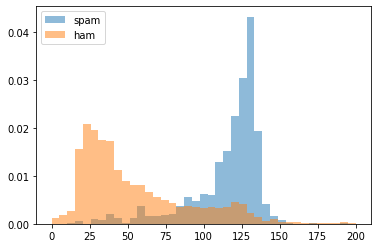

In [5]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5,density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

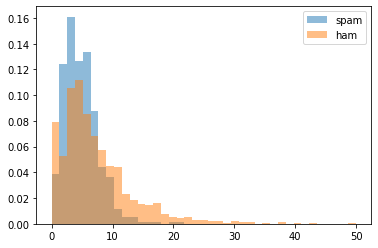

In [6]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['percentage'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['percentage'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

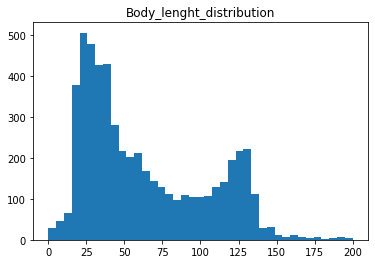

In [7]:
bins=np.linspace(0,200,40)
pyplot.hist(data['body_len'],bins)
pyplot.title('Body_lenght_distribution')
pyplot.show()

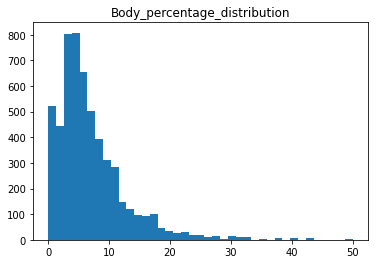

In [8]:
bins=np.linspace(0,50,40)
pyplot.hist(data['percentage'],bins)
pyplot.title('Body_percentage_distribution')
pyplot.show()

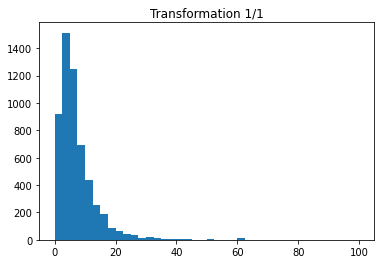

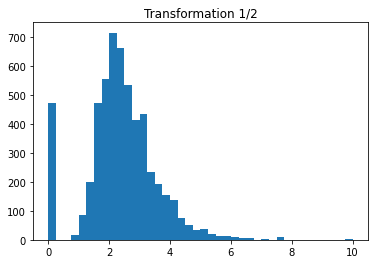

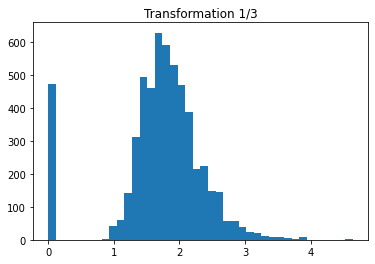

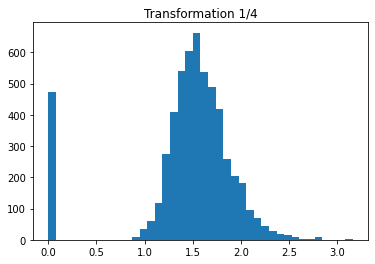

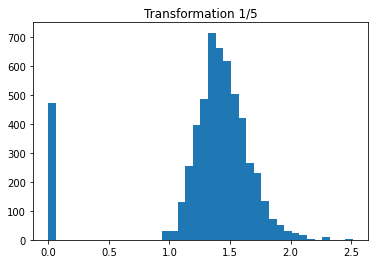

In [9]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['percentage']) **(1/i),bins=40)
    pyplot.title("Transformation 1/{}".format(str(i)))
    pyplot.show()